# Part 2: Xây dựng model

In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
import pandas as pd
from modules.file import CPandasFile

from typing import List

In [3]:
pandas_file = CPandasFile()

1.Đọc dữ liệu `news.csv` lên

In [4]:
news = pandas_file.readCsv(r'./data/news.csv', index_col=0)
news

,content,class
0,collin call chamber return world champion kim ...,sport
1,ronaldo consid new contract manchest unit wing...,sport
2,tv call carrol error spur boss martin jol said...,sport
3,england defens crisi grow england defens worri...,sport
4,darci injuri add ireland woe gordon darci ha r...,sport
...,...,...
2220,disney settl disclosur charg walt disney ha se...,business
2221,fed chief warn us deficit feder reserv chairma...,business
2222,indonesia declin debt freez indonesia longer n...,business
2223,market signal brazilian recoveri brazilian sto...,business


2. Xây dựng tập training data `X`

In [5]:
X = news['content'].values

X[:5]

array(['collin call chamber return world champion kim collin say suspend sprinter dwain chamber allow compet olymp chamber wa ban two year test posit anabol steroid thg hi suspens run novemb thi year collin say british olymp associ revers decis ban olymp life wa harsh collin told radio five live reconsid chamber ha america learn american footbal ha rule return track collin ad great guy never ani problem friend would like see dwain come back compet good person even though made mistak understand given chanc onc',
       'ronaldo consid new contract manchest unit winger cristiano ronaldo said close agre new contract old trafford portug star join august fiveyeard regular unit firstteam unit board alreadi made offer renew contract im tri think told news world agent ha spoken club resolv soon think well reach good agreement side ronaldo refus commit hi longterm futur club nobodi know come tomorrow like know ad arent mani bigger better club thi one ambit big club im happi nobodi know futur',


3. Build Model

3.1. Thử áp dụng K-Means

In [6]:
from modules.kmeans_text import CKMeansText

3.1.1. Build model

In [7]:
kmeans_text_model = CKMeansText(X)

3.1.2. Tìm giá trị k phù hợp

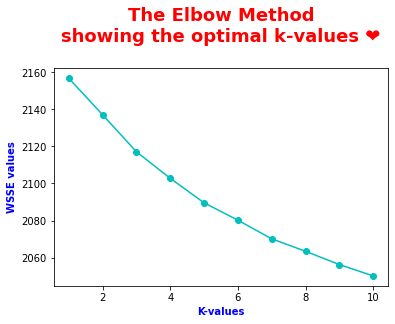

In [8]:
kmeans_text_model.recommendKValue()

> **Nhận xét**
> * Nhìn chung giá trị WSSE giảm mạnh trong khoảng từ \[2, 4\]. Bắt đầu từ từ 5 trở đi, giá trị WSSE giảm ko còn mạnh nữa.

> $\Rightarrow$ Xem xét k = 5, 6.

3.1.3. Build model với k-value = 5

In [9]:
k5_kmeans_model = CKMeansText(X)
k5_kmeans_model.initModel(5)

In [10]:
cluster_coors = k5_kmeans_model.showClusterCenter()

cluster_coors

array([[0.00000000e+00, 1.40552702e-04, 2.03332236e-04, ...,
        1.54137348e-03, 0.00000000e+00, 0.00000000e+00],
       [7.95849431e-05, 9.95681106e-05, 0.00000000e+00, ...,
        1.21166989e-02, 1.56000077e-04, 1.12329738e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.40461149e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.75179231e-03, 1.87661437e-04, ...,
        3.34963183e-03, 1.36855938e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.46741807e-03, 0.00000000e+00, 0.00000000e+00]])

In [11]:
cluster_coors.shape

(5, 21363)

In [12]:
labels = k5_kmeans_model.showSampleLabels()
news['label'] = labels

news

,content,class,label
0,collin call chamber return world champion kim ...,sport,3
1,ronaldo consid new contract manchest unit wing...,sport,3
2,tv call carrol error spur boss martin jol said...,sport,3
3,england defens crisi grow england defens worri...,sport,3
4,darci injuri add ireland woe gordon darci ha r...,sport,3
...,...,...,...
2220,disney settl disclosur charg walt disney ha se...,business,1
2221,fed chief warn us deficit feder reserv chairma...,business,1
2222,indonesia declin debt freez indonesia longer n...,business,1
2223,market signal brazilian recoveri brazilian sto...,business,1


3.1.4. Trực quan hóa dữ liệu

In [32]:
import numpy as np

label_group_content: np.array(str) = news.groupby('label')['content'].apply(np.array)

In [33]:
label_group_content

label
0    [norway uphold napster rule norwegian student ...
1    [newri fight cup exit court newri citi expect ...
2    [voter flock blog award site vote way annual b...
3    [collin call chamber return world champion kim...
4    [lib dem bold elect polici charl kennedi ha to...
Name: content, dtype: object

 uk busi sprint forward ict use challeng ahead report carri independ consult booz allen hamilton hi europ place uk third behind sweden ireland busi use ict show british busi brought greater matur ict use use broadband increas number bring ict busi plan use new technolog voic activ programm desktop video confer mr obrien said increas proport busi connect broadband show uk compani embrac opportun ict bring particularli encourag see small busi begin narrow digit divid appear open recent year govern would play part cultiv environ inform commun technolog flourish mr obrien said clear messag report send effect use ict bring real improv busi perform busi howev finish line yet mani challeng remain uk reach aim becom worldlead eeconomi ad intern benchmark studi wa base telephon interview busi uk busi eighth seri examin adopt deploy ict world industrialis nation mp issu blackberri threat mp thrown common use blackberri chamber speaker michael martin ha rule â handheld comput use phone pager send

In [26]:
df[0]

ict show british busi brought greater matur ict use use broadband increas number bring ict busi plan use new technolog voic activ programm desktop video confer mr obrien said increas proport busi connect broadband show uk compani embrac opportun ict bring particularli encourag see small busi begin narrow digit divid appear open recent year govern would play part cultiv environ inform commun technolog flourish mr obrien said clear messag report send effect use ict bring real improv busi perform busi howev finish line yet mani challeng remain uk reach aim becom worldlead eeconomi ad intern benchmark studi wa base telephon interview busi uk busi eighth seri examin adopt deploy ict world industrialis nation',
       'mp issu blackberri threat mp thrown common use blackberri chamber speaker michael martin ha rule â handheld comput use phone pager send email devic gain new promin thi week alastair campbel use hi accident send expletiveladen messag newsnight journalist mr martin reveal mp use